In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

"""\
http://www.instructables.com/id/How-to-make-Instagram-Filters-in-Photoshop/
"""\

'http://www.instructables.com/id/How-to-make-Instagram-Filters-in-Photoshop/\n'

In [10]:
amaro = {"red": {"x": [0, 30, 82, 128, 145, 255], "y": [19, 62, 148, 188, 200, 250]},
         "green": {"x": [0, 48, 115, 160, 233, 255], "y": [0, 72, 188, 220, 245, 255]},
         "blue": {"x": [0, 35, 106, 151, 215, 240, 255], "y": [25, 80, 175, 188, 215, 235, 245]}}

def apply_filter(image, filt):
    filtered_image = np.copy(image)
    filtered_image[:,:,0] = np.interp(filtered_image[:,:,0]*255, filt["red"]["x"], filt["red"]["y"]) / 255
    filtered_image[:,:,1] = np.interp(filtered_image[:,:,1]*255, filt["green"]["x"], filt["green"]["y"]) / 255
    filtered_image[:,:,2] = np.interp(filtered_image[:,:,2]*255, filt["blue"]["x"], filt["blue"]["y"]) / 255
    return filtered_image
    

In [25]:
def f(x):
    image = mpimg.imread(x)
    fig, axis = plt.subplots(1, 2, figsize=(20, 20))
    axis[0].imshow(image)
    axis[1].imshow(apply_filter(image, amaro), interpolation="gaussian")
    axis[0].set_xticks([]), axis[0].set_yticks([])
    axis[1].set_xticks([]), axis[1].set_yticks([])

In [26]:
url = interact(f, x='Enter image\'s url');

interactive(children=(Text(value="Enter image's url", description='x'), Output()), _dom_classes=('widget-inter…

In [8]:
# http://beta.ems.ladbiblegroup.com/s3/content/808x455/c1a3fc645ad4f2d8459b7595c5c5e4be.png
image = mpimg.imread(url)
new_image = np.copy(image[:, :, :3])
pixels = new_image.reshape(-1, 3)

TypeError: Object does not appear to be a 8-bit string path or a Python file-like object

In [9]:
g = "0:0 48:72 115:188 160:220 233:245 255:255"
b = "0:25 35:80 106:175 151:188 215:215 240:235 255:245"
g = b.split()
[[int(k.split(':')[0]) for k in g], [int(k.split(':')[1]) for k in g]]

[[0, 35, 106, 151, 215, 240, 255], [25, 80, 175, 188, 215, 235, 245]]

NameError: name 'image' is not defined

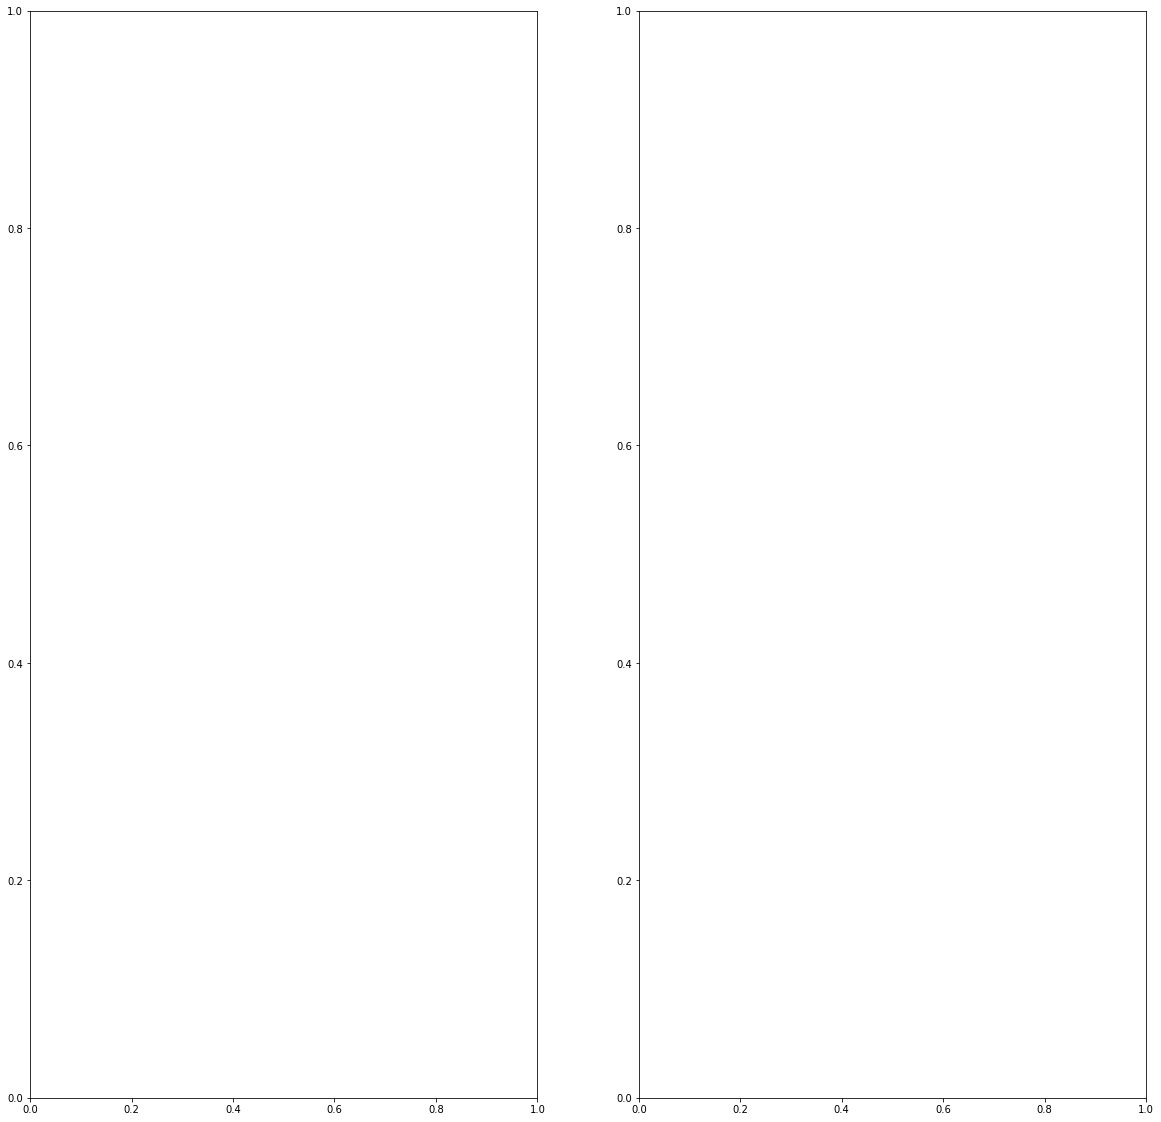

In [11]:
fig, axis = plt.subplots(1, 2, figsize=(20, 20))
axis[0].imshow(image)
axis[1].imshow(apply_filter(image, amaro), interpolation="gaussian")
axis[0].set_xticks([]), axis[0].set_yticks([])
axis[1].set_xticks([]), axis[1].set_yticks([])

In [ ]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20, 20),
                         subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(apply_filter(image, amaro), interpolation=interp_method)
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

In [ ]:
print(image[:5, :5, :])